In [8]:
import sys
sys.path.append('../')
from data_loader import DataLoader
import random
import configparser
from feature_selector import BaselineSelector, AnalysisSelector
from feature_selector import FeatureExtractor
import numpy as np
from utils import parse_config_features
import pandas as pd 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

['config.ini']

In [10]:
X = pd.read_csv(config['Data']['features_path'])
y = np.load(config['Data']['labels_path'])

In [11]:
X.columns

Index(['Unnamed: 0', 'skewness_alpha_0', 'skewness_alpha_1',
       'skewness_alpha_2', 'skewness_alpha_3', 'skewness_alpha_4',
       'skewness_alpha_5', 'skewness_alpha_6', 'skewness_alpha_7',
       'skewness_alpha_8',
       ...
       'hjorth_complexity_theta_9', 'hjorth_complexity_theta_10',
       'hjorth_complexity_theta_11', 'hjorth_complexity_theta_12',
       'hjorth_complexity_theta_13', 'hjorth_complexity_theta_14',
       'hjorth_complexity_theta_15', 'hjorth_complexity_theta_16',
       'hjorth_complexity_theta_17', 'hjorth_complexity_theta_18'],
      dtype='object', length=476)

In [7]:
from sklearn.feature_selection import mutual_info_classif

In [8]:
mutual_info = mutual_info_classif(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)

In [9]:
print(mutual_info_series[:15])

skewness_gamma_18    0.011257
skewness_beta_14     0.010415
skewness_gamma_11    0.010331
skewness_beta_15     0.007686
skewness_alpha_8     0.007178
skewness_beta_17     0.006633
skewness_beta_11     0.006029
skewness_alpha_11    0.005482
skewness_beta_3      0.004894
skewness_beta_8      0.004793
skewness_alpha_14    0.004292
skewness_beta_9      0.004264
skewness_alpha_4     0.003781
skewness_gamma_13    0.003250
skewness_alpha_3     0.003025
dtype: float64


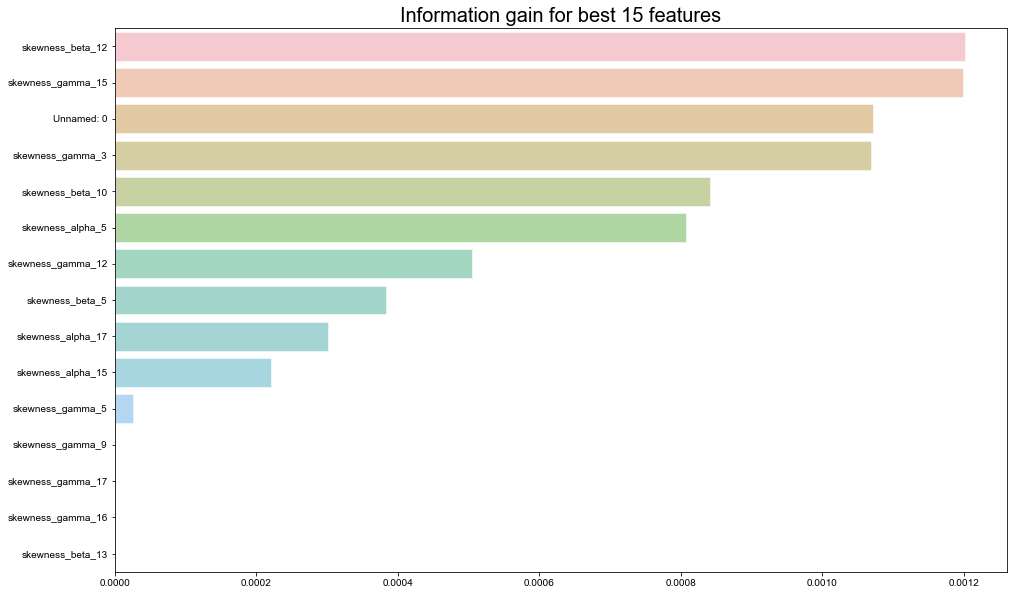

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))
    
plt.grid()
sns.set(style='darkgrid')
plt.grid()
sns.barplot(x=mutual_info_series.values[30:45], y=mutual_info_series.index[30:45], alpha=0.5)

plt.title(f'Information gain for best 15 features', fontdict = {'fontsize' : 20})
plt.savefig(f'data/plots/information_gain/ig_best_15.png', dpi = 300)

In [11]:
print(mutual_info_series.index)
for i, m in enumerate(mutual_info_series.index):
    first = m.split('_')[0]
    if first != 'hjorth':
        print(mutual_info_series.index[i])
        print(mutual_info_series.values[i])

Index(['skewness_gamma_18', 'skewness_beta_14', 'skewness_gamma_11',
       'skewness_beta_15', 'skewness_alpha_8', 'skewness_beta_17',
       'skewness_beta_11', 'skewness_alpha_11', 'skewness_beta_3',
       'skewness_beta_8', 'skewness_alpha_14', 'skewness_beta_9',
       'skewness_alpha_4', 'skewness_gamma_13', 'skewness_alpha_3',
       'skewness_gamma_7', 'skewness_alpha_9', 'skewness_gamma_14',
       'skewness_alpha_13', 'skewness_beta_16', 'skewness_gamma_0',
       'skewness_beta_6', 'skewness_alpha_16', 'skewness_gamma_6',
       'skewness_alpha_6', 'skewness_alpha_1', 'skewness_beta_2',
       'skewness_alpha_12', 'skewness_gamma_1', 'skewness_alpha_10',
       'skewness_beta_12', 'skewness_gamma_15', 'Unnamed: 0',
       'skewness_gamma_3', 'skewness_beta_10', 'skewness_alpha_5',
       'skewness_gamma_12', 'skewness_beta_5', 'skewness_alpha_17',
       'skewness_alpha_15', 'skewness_gamma_5', 'skewness_gamma_9',
       'skewness_gamma_17', 'skewness_gamma_16', 'skewness_b